In [4]:
#import libraries and dependencies
import pandas as pds
import numpy as npy
from sklearn.model_selection import train_test_split
import pickle

In [19]:
#import and read dataset.
dataFrame = pds.read_csv("C:\\Users\\Acer\\Desktop\\Closeing\\Apple\\AAPL(ClosingVal-tomorrow).csv")

In [20]:
dataFrame.head()

,Date,Open,High,Low,Volume,Close
0,1/2/1998,0.121652,0.145089,0.120536,718110400,0.141741
1,1/5/1998,0.147321,0.147879,0.135603,651873600,0.169085
2,1/6/1998,0.142299,0.178571,0.131696,1812473600,0.156250
3,1/7/1998,0.167969,0.169643,0.154576,1041622400,0.162388
4,1/8/1998,0.155692,0.166295,0.151228,774020800,0.162388


In [21]:
dataFrame.tail()

,Date,Open,High,Low,Volume,Close
5839,3/18/2021,122.879997,123.180000,120.320000,121229700,119.989998
5840,3/19/2021,119.900002,121.430000,119.680000,185023200,123.389999
5841,3/22/2021,120.330002,123.870003,120.260002,111912300,122.540001
5842,3/23/2021,123.330002,124.239998,122.139999,95467100,120.089996
5843,3/24/2021,122.820000,122.900002,120.070000,88530500,120.589996


In [22]:
#checking for null values and the total no.of records.
dataFrame.isna().sum()

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64

In [23]:
dataFrame.shape

(5844, 6)

In [24]:
#remove date coloumn.
del dataFrame['Date']

In [25]:
#assign x as dataframe.
trainColoumn = dataFrame

In [26]:
# assign X and y to the train and test coloumns.
trainColoumn = npy.array(trainColoumn.drop(['Close'], 1))
testColoumn = npy.array(dataFrame['Close'])

In [27]:
#data spliting and defining.
x_training, x_testing, y_training, y_testing = train_test_split(trainColoumn, testColoumn, test_size=0.2, random_state=42)


In [28]:
#validating the split has correctly divided the dataset.
x_training.shape

(4675, 4)

In [29]:
y_training.shape

(4675,)

In [30]:
x_testing.shape

(1169, 4)

In [31]:
y_testing.shape

(1169,)

### Random Forest

In [32]:
#import Roandom Forest model
from sklearn.ensemble import RandomForestRegressor

In [33]:
#fitting into the model
rfr = RandomForestRegressor()
rfr.fit(x_training, y_training)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
#predict target from training data
rfr_predictions = rfr.predict(x_testing)
rfr_predictions

array([ 5.18809642,  0.38791263,  0.3677086 , ..., 47.66549937,
       42.84862462, 51.69555009])

In [35]:
def mda(ytesting:npy.ndarray,predicted:npy.ndarray):
    """ Mean Directional Accuracy """
    return npy.mean((npy.sign(y_testing[1:]-y_testing[:-1])== npy.sign(predicted[1:]- predicted[:-1])).astype(int))

In [36]:
from sklearn import metrics
#Accuracy scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testing, rfr_predictions))
print('Mean r2 score:', metrics.r2_score(y_testing, rfr_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_testing, rfr_predictions))
print('Root Mean Squared Error:', npy.sqrt(metrics.mean_squared_error(y_testing, rfr_predictions)))
print('Mean Directional Accuracy:', mda(y_testing, rfr_predictions))

Mean Absolute Error: 0.2888987280291802
Mean r2 score: 0.9992201771850024
Mean Squared Error: 0.49391893851300817
Root Mean Squared Error: 0.7027936670979671
Mean Directional Accuracy: 0.9914383561643836


In [31]:
pickle.dump(rfr, open("aapl_tmrwPrediction.pkl", 'wb'))
print('model saved...')

model saved...


### Predicting for 7th April using 6th Open, High, Low, Volume 

In [37]:
rfr.predict([[126.5,127.13,125.65,79463200]])

array([125.31080023])

### Graph

In [38]:
import matplotlib.pyplot as plt

In [39]:
newDataFrame=pds.read_csv("C:\\Users\\Acer\\Desktop\\Closeing\\Apple\\Apple(DataFrom26March)-Tomorrow.csv")

In [40]:
newDataFrame.head()

,Date,Open,High,Low,Volume,Close
0,26-Mar-21,120.349998,121.480003,118.919998,93958900,121.389999
1,29-Mar-21,121.650002,122.580002,120.730003,80819200,119.900002
2,30-Mar-21,120.110001,120.400002,118.860001,85671900,122.150002
3,31-Mar-21,121.650002,123.519997,121.150002,118323800,123.000000
4,1-Apr-21,123.660004,124.180000,122.489998,74957400,125.900002


In [42]:
keep_columns=['Open','High','Low','Volume']
new_x_val=newDataFrame[keep_columns]

In [43]:
predictions = rfr.predict(new_x_val)

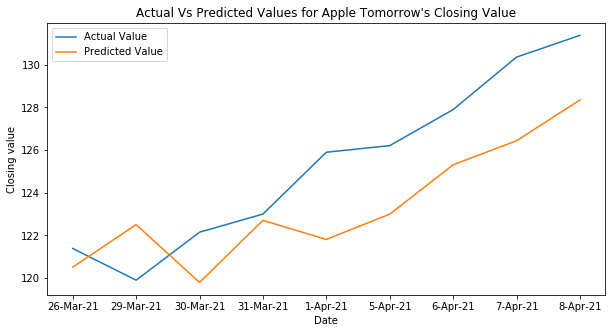

In [45]:
plt.figure(figsize=(10,5))
plt.plot(newDataFrame['Date'],newDataFrame['Close'], label ='Actual Value')
plt.plot(newDataFrame['Date'],predictions, label ='Predicted Value')
plt.xlabel('Date')
plt.ylabel('Closing value')
plt.title("Actual Vs Predicted Values for Apple Tomorrow's Closing Value")
plt.legend()